In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
from pylab import cm
import pandas as pd

In [14]:
import matplotlib.font_manager as fm
font_names = [f.name for f in fm.fontManager.ttflist]

In [103]:
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

In [16]:
# Generate 2 colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', 3)
print(colors(1))

(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)


In [134]:
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def plot_mcmc_diagnostic(data1, data2, data3, filename):

    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_axes([0,0,0.45,0.2])

    minimum = 1.99
    maximum = 2.04

    ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax2 = fig.add_axes([0,1/3.,0.45,0.2])
    ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax3 = fig.add_axes([0.0,2/3.,0.45,0.2])
    ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax1.plot(data1, linewidth=2, color = colors(0))
    ax1.set_xlabel("Iteration", labelpad=10)
    ax1.set_ylabel("Energy (a.u)", labelpad=10)
    ax1.set_title("Trace-plot. MC step-length = 0.05", pad=10)
    ax1.set_ylim((minimum, maximum))

    ax2.plot(data2, linewidth=2, color = colors(1))
    ax2.set_ylabel("Energy (a.u)", labelpad=10)
    ax2.set_xlabel("Iteration", labelpad=10)
    ax2.set_title("Trace-plot. MC step-length = 0.5", pad=10)
    ax2.set_ylim((minimum, maximum))


    ax3.plot(data3, linewidth=2, color = colors(2))
    ax3.set_xlabel("Iteration", labelpad=10)
    ax3.set_ylabel("Energy (a.u)", labelpad=10)
    ax3.set_title("Trace-plot. MC step-length = 5.0", pad=10)
    # ax3.set_ylim((minimum, maximum))


    ax4 = fig.add_axes([0.55,0,0.15,0.2])
    ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax5 = fig.add_axes([0.55,1/3.,0.15,0.2])
    ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax6 = fig.add_axes([0.55,2/3.,0.15,0.2])
    ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax4.hist(data1, linewidth=2, color = colors(0), bins=100)
    ax4.set_xlabel("Energy (a.u)", labelpad=10)
    ax4.set_ylabel("Frequency", labelpad=10)
    ax4.set_title("Histogram. MC step-length = 0.05", pad=10)
    ax4.set_xlim((minimum, maximum))


    ax5.hist(data2, linewidth=2, color = colors(1), bins=100)
    ax5.set_xlabel("Energy (a.u)", labelpad=10)
    ax5.set_ylabel("Frequency", labelpad=10)
    ax5.set_title("Histogram. MC step-length = 0.5", pad=10)
    ax5.set_xlim((minimum, maximum))


    ax6.hist(data3, linewidth=2, color = colors(2), bins=100)
    ax6.set_xlabel("Energy (a.u)", labelpad=10)
    ax6.set_ylabel("Frequency", labelpad=10)
    ax6.set_title("Histogram. MC step-length = 5.0", pad=10)
    # ax6.set_xlim(minimum, maximum)

    ax7 = fig.add_axes([0.8,0,0.15,0.2])
    ax7.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax7.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax8= fig.add_axes([0.8,1/3.,0.15,0.2])
    ax8.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax8.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax9 = fig.add_axes([0.8,2/3.,0.15,0.2])
    ax9.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax9.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    pd.plotting.lag_plot(pd.DataFrame(data1), lag=1, ax = ax7, c=colors(0))
    ax7.set_title("Correlation plot. MC step-length = 0.05", pad=10)
    # ax7.hist(data, linewidth=2, color = colors(0))
    # ax7.set_xlabel("Energy (a.u)", labelpad=10)
    # ax7.set_ylabel("Frequency", labelpad=10)

    pd.plotting.lag_plot(pd.DataFrame(data2), lag=1, ax = ax8, c=colors(1))
    ax8.set_title("Correlation plot. MC step-length = 0.5", pad=10)

    # ax8.hist(data, linewidth=2, color = colors(1))
    # ax8.set_xlabel("Energy (a.u)", labelpad=10)
    # ax8.set_ylabel("Frequency", labelpad=10)

    pd.plotting.lag_plot(pd.DataFrame(data3), lag=1, ax = ax9, c=colors(2))
    ax9.set_title("Correlation plot. MC step-length = 5.0", pad=10)

    # ax9.hist(data, linewidth=2, color = colors(2))
    # ax9.set_xlabel("Energy (a.u)", labelpad=10)
    # ax9.set_ylabel("Frequency", labelpad=10)

    plt.savefig(filename, bbox_inches='tight')
    
def plot_mcmc_diagnostic2(data1, data2, data3, data4, filename):

    fig = plt.figure(figsize=(20,30))
    
    ax1 = fig.add_axes([0,0,0.45,0.1])
    ax1.xaxis.set_tick_params(which='major', size=15, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax1.yaxis.set_tick_params(which='major', size=15, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    
    ax2 = fig.add_axes([0.55,0,0.45,0.1])
    ax2.xaxis.set_tick_params(which='major', size=15, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax2.yaxis.set_tick_params(which='major', size=15, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax3 = fig.add_axes([0.0,0.15,1.0,0.1])
    ax3.xaxis.set_tick_params(which='major', size=15, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax3.yaxis.set_tick_params(which='major', size=15, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    
    ax1.hist(data1, linewidth=2, color = colors(0), bins=100)
    ax1.set_xlabel("Energy (a.u)", labelpad=10)
    ax1.set_ylabel("Frequency", labelpad=10)
    ax1.set_title("Histogram. MC step-length = 0.05", pad=10)
#     ax2.set_ylim((minimum, maximum))

    pd.plotting.lag_plot(pd.DataFrame(data1), lag=1, ax = ax2, c=colors(0))
    ax2.set_title("Correlation plot. MC step-length = 0.05", pad=10)
    
    ax3.plot(data1, linewidth=2, color = colors(0))
    ax3.set_xlabel("Iteration", labelpad=10)
    ax3.set_ylabel("Energy (a.u)", labelpad=10)
    ax3.set_title("Trace-plot. MC step-length = 0.05", pad=10)


    ax4 = fig.add_axes([0,0.3,0.45,0.1])
    ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
#     ax4.xaxis.set_tick_params(which='minor', size=200, width=2, direction='in', top=True)
    ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax5 = fig.add_axes([0.55,0.3,0.45,0.1])
    ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax6 = fig.add_axes([0,0.45,1.0,0.1])
    ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

#     ax4.hist(data1, linewidth=2, color = colors(1), bins=100)
#     ax4.set_xlabel("Energy (a.u)", labelpad=10)
#     ax4.set_ylabel("Frequency", labelpad=10)
#     ax4.set_title("Histogram. MC step-length = 0.05", pad=10)
#     ax4.set_xlim((minimum, maximum))

    ax6.plot(data2, linewidth=2, color = colors(1))
    ax6.set_ylabel("Energy (a.u)", labelpad=10)
    ax6.set_xlabel("Iteration", labelpad=10)
    ax6.set_title("Trace-plot. MC step-length = 0.5", pad=10)


    pd.plotting.lag_plot(pd.DataFrame(data2), lag=1, ax = ax5, c=colors(1))
    ax5.set_title("Correlation plot. MC step-length = 0.5", pad=10)
#     ax5.set_xlim((minimum, maximum))


    ax4.hist(data2, linewidth=2, color = colors(1), bins=100)
    ax4.set_xlabel("Energy (a.u)", labelpad=10)
    ax4.set_ylabel("Frequency", labelpad=10)
    ax4.set_title("Histogram. MC step-length = 5.0", pad=10)
    # ax6.set_xlim(minimum, maximum)

    ax7 = fig.add_axes([0.0,0.6,0.45,0.1])
    ax7.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax7.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    
    ax8= fig.add_axes([0.55,0.6,0.45,0.1])
    ax8.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax8.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax9 = fig.add_axes([0,0.75,1.0,0.1])
    ax9.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax9.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    
    ax7.hist(data3, linewidth=2, color = colors(2), bins=100)
    ax7.set_xlabel("Energy (a.u)", labelpad=10)
    ax7.set_ylabel("Frequency", labelpad=10)
    ax7.set_title("Histogram. MC step-length = 5.0", pad=10)
    

    pd.plotting.lag_plot(pd.DataFrame(data3), lag=1, ax = ax8, c=colors(2))
    ax8.set_title("Correlation plot. MC step-length = 0.05", pad=10)
    
    ax9.plot(data3, linewidth=2, color = colors(2))
    ax9.set_ylabel("Energy (a.u)", labelpad=10)
    ax9.set_xlabel("Iteration", labelpad=10)
    ax9.set_title("Trace-plot. MC step-length = 0.5", pad=10)





#     plt.savefig(filename, bbox_inches='tight')
    
    
# from blocking import block

def block(x): 
    # preliminaries
    n = len(x)
    d = int(log2(n))
    s, gamma = zeros(d), zeros(d)
    mu = mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = var(x)
        # perform blocking transformation
        x = 0.5*(x[0:-1:2] + x[1::2])
   
    # generate the test observator M_k from the theorem
    M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)


def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length): 
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length


# Brute-force

In [108]:
data1_BF = np.loadtxt("../Data/Non-interacting/metropolis/rbm_bf_step_length_0.5_num_hidden_3.txt")
data2_BF = np.loadtxt("../Data/Non-interacting/metropolis/rbm_bf_step_length_5.0_num_hidden_3.txt")
data3_BF = np.loadtxt("../Data/Non-interacting/metropolis/rbm_bf_step_length_50.0_num_hidden_3.txt")

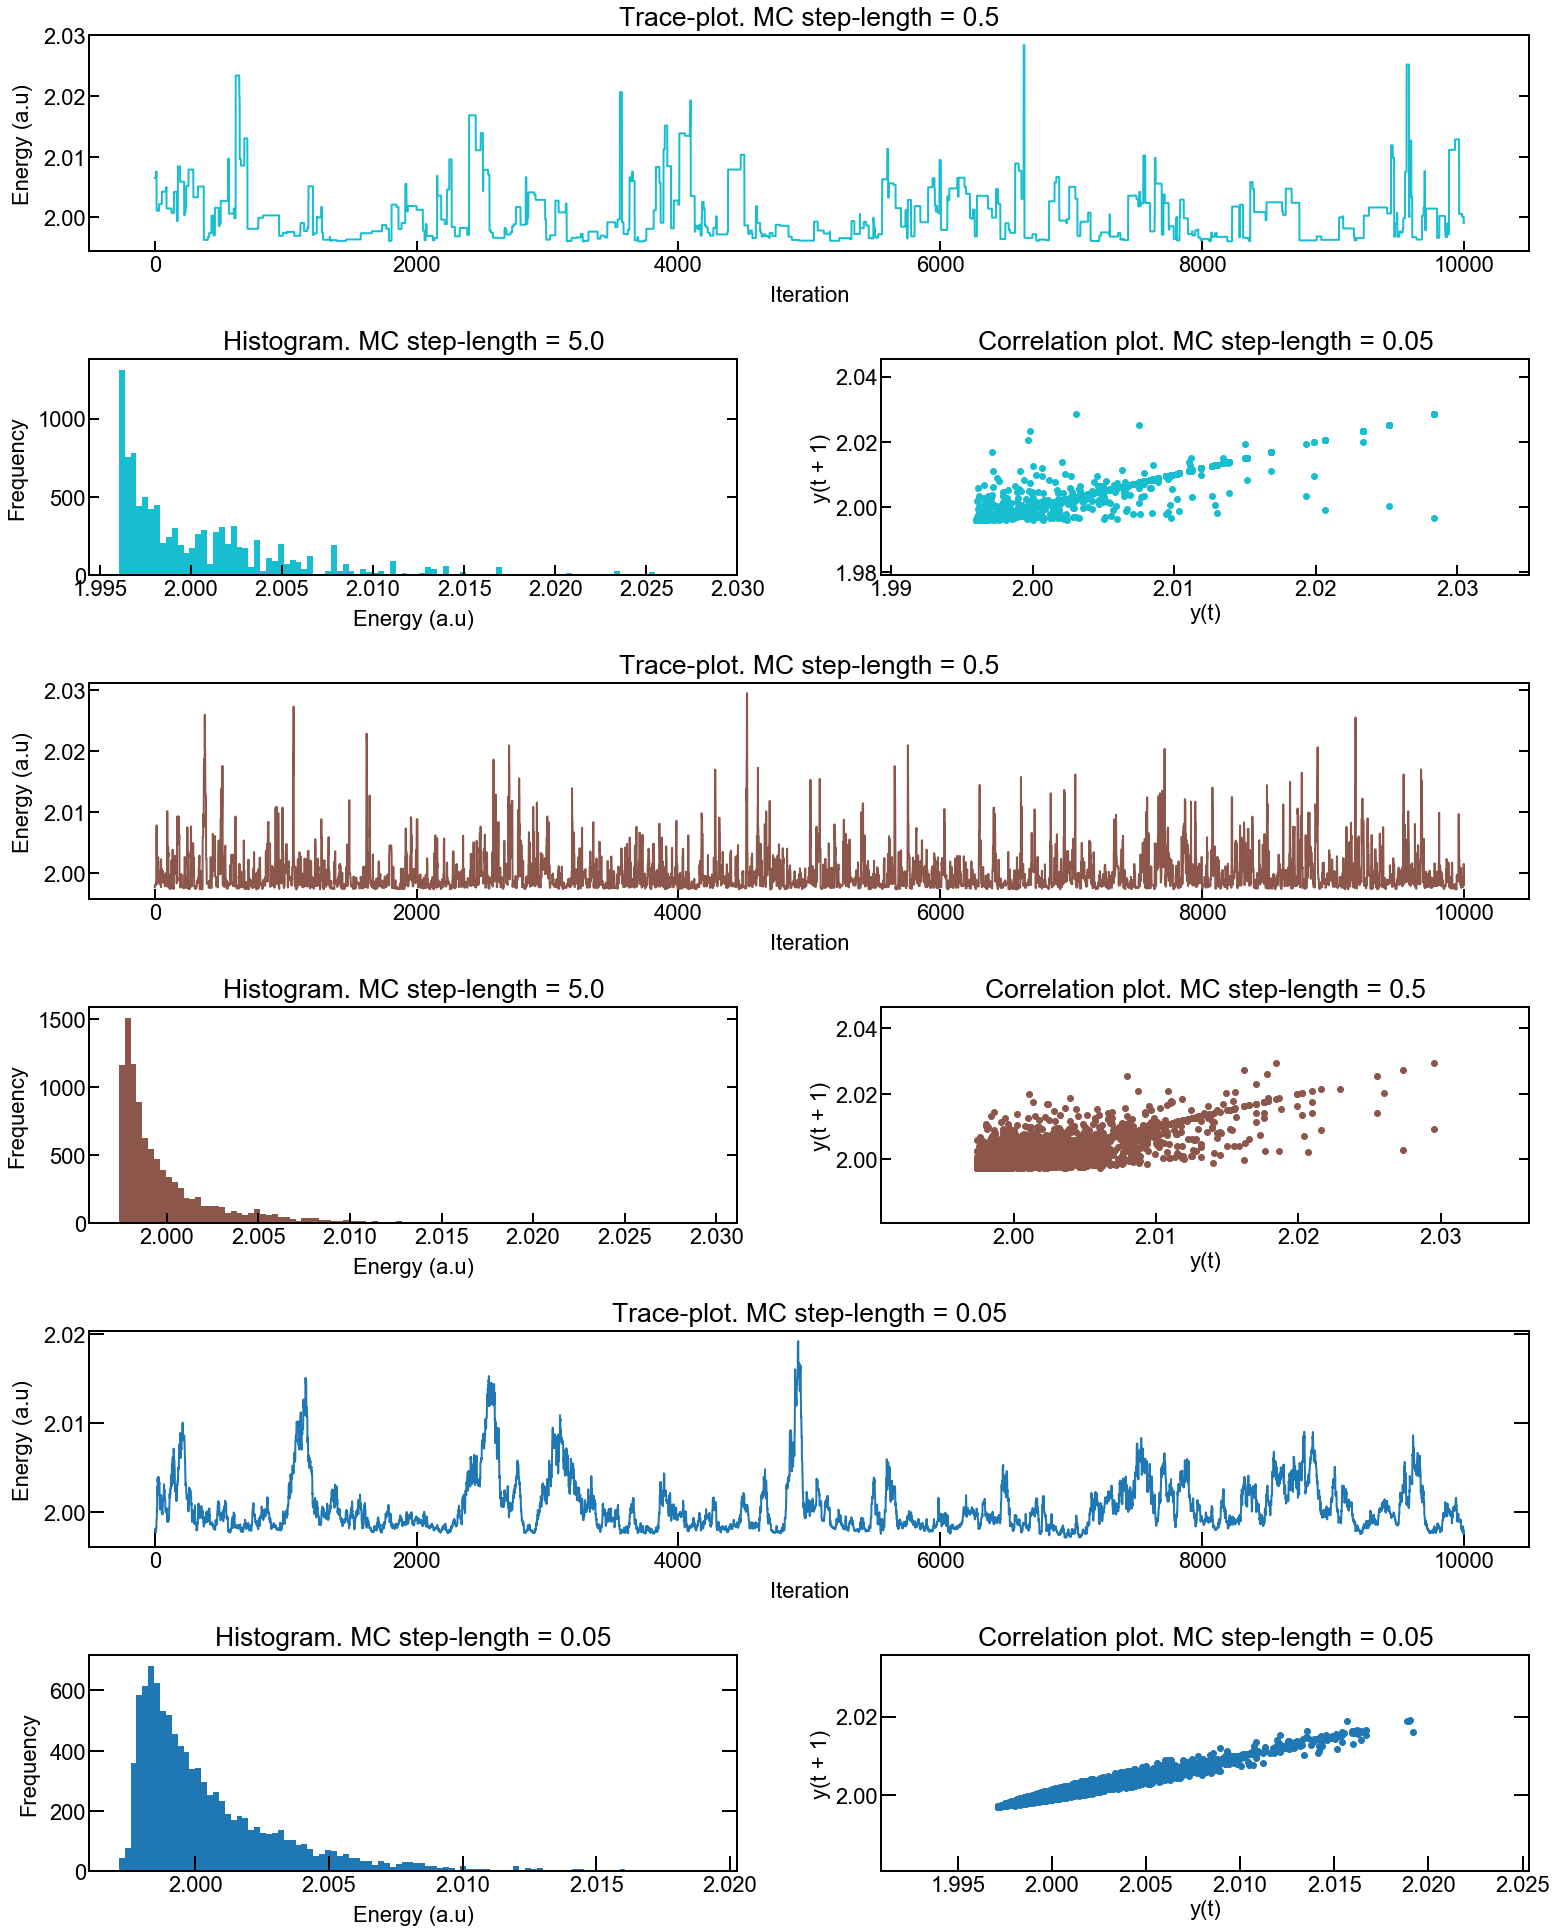

In [135]:
# plot_mcmc_diagnostic(data1_BF, data2_BF, data3_BF, "rbm_bf.png")
data1_BF = data1_BF[0:10000]
data2_BF = data2_BF[0:10000]
data3_BF = data3_BF[0:10000]
data3_BF = data3_BF[0:10000]

plot_mcmc_diagnostic2(data1_BF, data2_BF, data3_BF, data3_BF, "TS")

In [62]:
block1 = block(data1_BF)
block2 = block(data2_BF)
block3 = block(data3_BF)

energies = [block1[0], block2[0], block3[0]]
variances = [block1[1], block2[1], block3[1]]
acceptances = [acceptance_ratio(data1_BF), acceptance_ratio(data2_BF), acceptance_ratio(data3_BF)]

df = pd.DataFrame({"MC step-length": [0.05, 0.5, 5.0],"Energy" : energies, "Var" : variances, "Acceptance ratio" : acceptances })
print(df.to_latex(index=False))
# print(block(data1), acceptance_ratio(data1))
# print(block(data2), acceptance_ratio(data2))
# print(block(data3), acceptance_ratio(data3))

0.93011474609375
0.4344158172607422
0.044861793518066406
\begin{tabular}{rrrr}
\toprule
 MC step-length &    Energy &           Var &  Acceptance ratio \\
\midrule
           0.05 &  2.000030 &  1.590304e-09 &          0.930115 \\
           0.50 &  2.000008 &  1.155452e-10 &          0.434416 \\
           5.00 &  2.000061 &  2.264601e-09 &          0.044862 \\
\bottomrule
\end{tabular}



# Importance-sampling

In [64]:
data1_IS = np.loadtxt("../Data/Non-interacting/metropolis/rbm_is_step_length_0.05_num_hidden_3.txt")
data2_IS = np.loadtxt("../Data/Non-interacting/metropolis/rbm_is_step_length_0.5_num_hidden_3.txt")
data3_IS = np.loadtxt("../Data/Non-interacting/metropolis/rbm_is_step_length_5.0_num_hidden_3.txt")
data4_IS = np.loadtxt("../Data/Non-interacting/metropolis/rbm_is_step_length_0.005_num_hidden_3.txt")

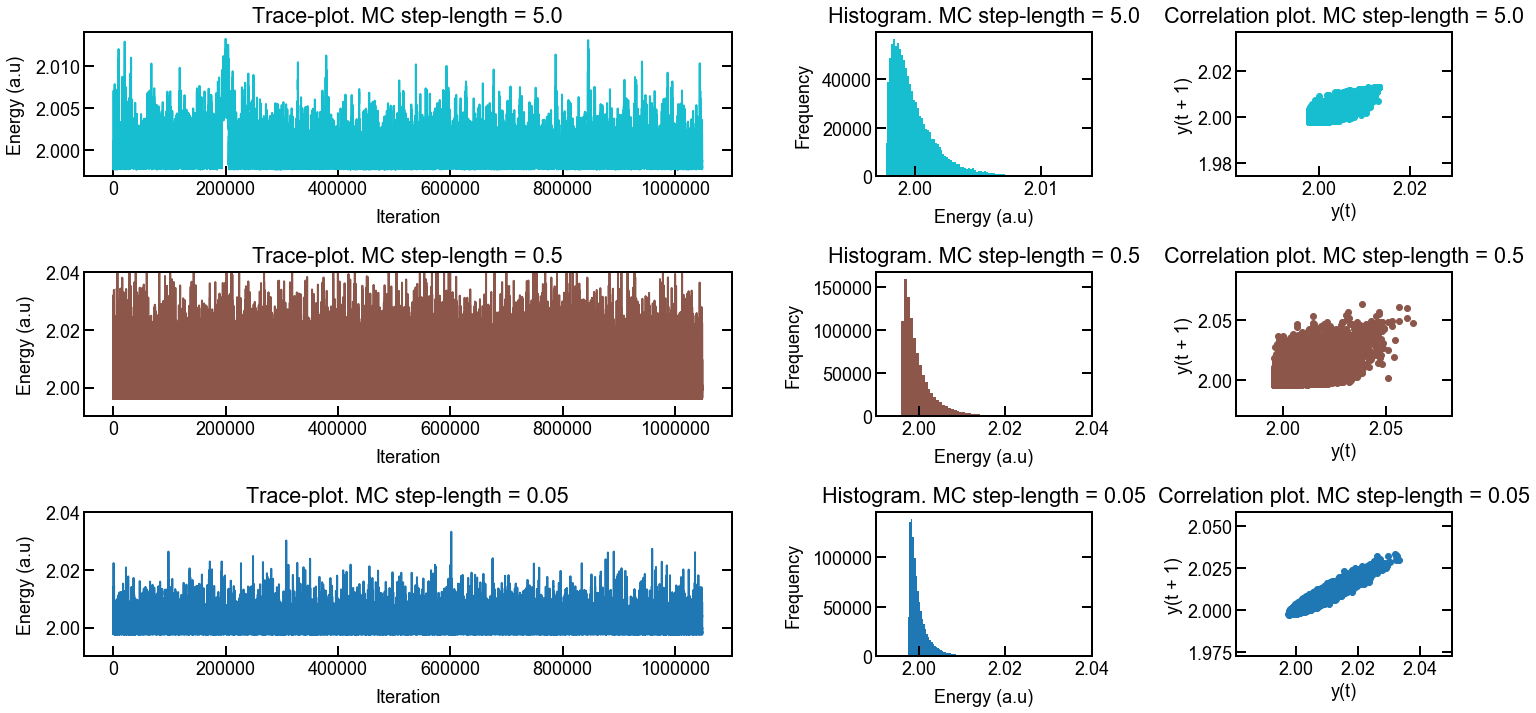

In [53]:
plot_mcmc_diagnostic(data1_IS, data2_IS, data3_IS, "metropolis_rbm_is_num_hidden_3.png")

In [67]:
block1 = block(data1_IS)
block2 = block(data2_IS)
block3 = block(data3_IS)
block4 = block(data4_IS)

energies = [block1[0], block2[0], block3[0], block4[0]]
variances = [block1[1], block2[1], block3[1], block4[1]]
acceptances = [acceptance_ratio(data1_IS), acceptance_ratio(data2_IS), acceptance_ratio(data3_IS), acceptance_ratio(data4_IS)]

df = pd.DataFrame({"MC step-length": [0.005, 0.05, 0.5, 5.0],"Energy" : energies, "Var" : variances, "Acceptance ratio" : acceptances })
print(df.to_latex(index=False))

0.9974441528320312
0.9207181930541992
0.15904998779296875
0.9999237060546875
\begin{tabular}{rrrr}
\toprule
 MC step-length &    Energy &           Var &  Acceptance ratio \\
\midrule
          0.005 &  2.000051 &  8.939741e-10 &          0.997444 \\
          0.050 &  1.999998 &  1.336086e-10 &          0.920718 \\
          0.500 &  1.999957 &  5.153589e-09 &          0.159050 \\
          5.000 &  1.999902 &  5.170463e-09 &          0.999924 \\
\bottomrule
\end{tabular}



In [44]:
data1 = np.loadtxt("vmc_rbm_bf_step_length_5.0.txt")
data2 = np.loadtxt("vmc_rbm_bf_step_length_5.0.txt")
data3 = np.loadtxt("vmc_rbm_bf_step_length_5.0.txt")

plot_mcmc_diagnostic



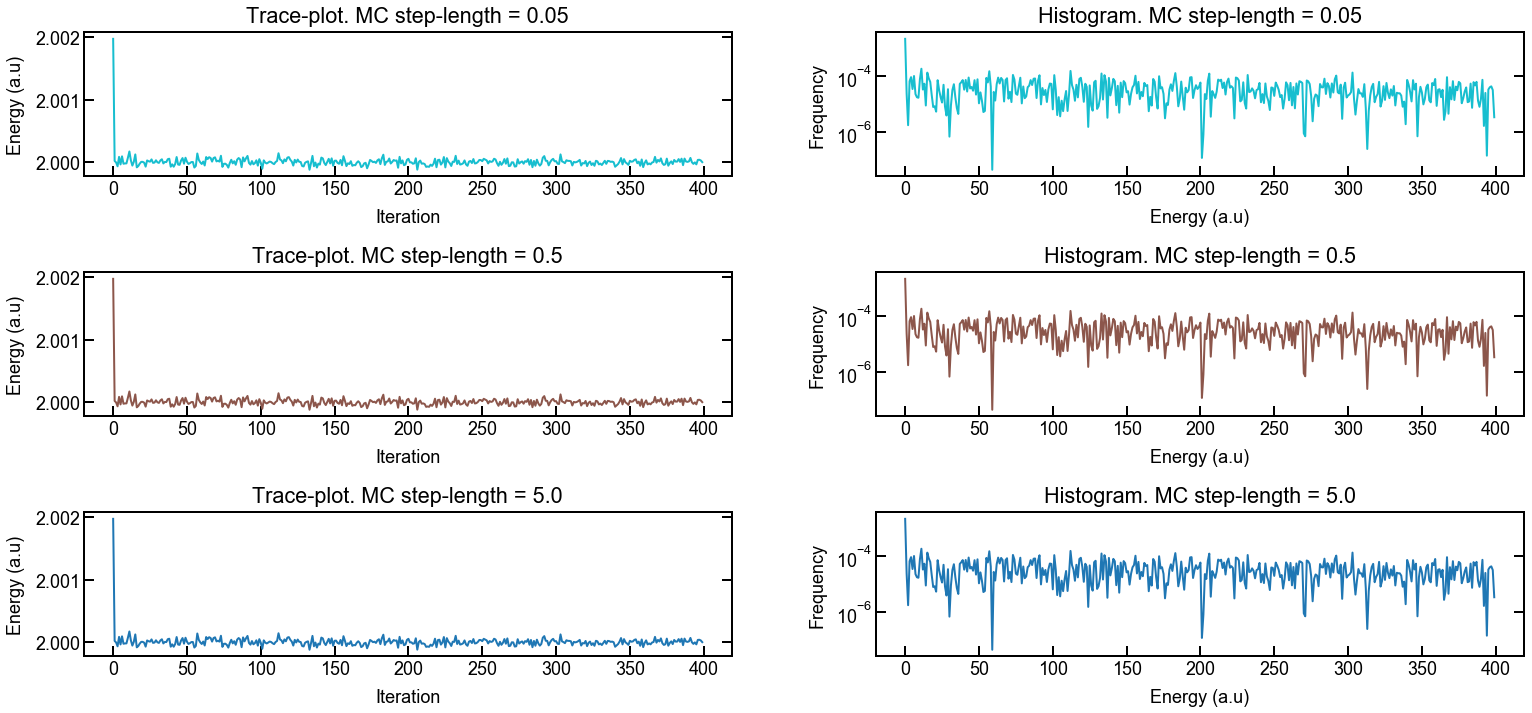

In [45]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_axes([0,0,0.45,0.2])
ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
# ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
# ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
ax2 = fig.add_axes([0,1/3.,0.45,0.2])
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
# ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
# ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

ax3 = fig.add_axes([0.0,2/3.,0.45,0.2])
ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
# ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
# ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

ax1.plot(data1, linewidth=2, color = colors(0))
ax1.set_xlabel("Iteration", labelpad=10)
ax1.set_ylabel("Energy (a.u)", labelpad=10)
ax1.set_title("Trace-plot. MC step-length = 5.0", pad=10)
# ax1.set_ylim((1, 2.4))

ax2.plot(data2, linewidth=2, color = colors(1))
ax2.set_ylabel("Energy (a.u)", labelpad=10)
ax2.set_xlabel("Iteration", labelpad=10)
ax2.set_title("Trace-plot. MC step-length = 0.5", pad=10)
# ax2.set_ylim((1, 2.4))


ax3.plot(data3, linewidth=2, color = colors(2))
ax3.set_xlabel("Iteration", labelpad=10)
ax3.set_ylabel("Energy (a.u)", labelpad=10)
ax3.set_title("Trace-plot. MC step-length = 0.05", pad=10)
# ax3.set_ylim((1, 2.4))


ax4 = fig.add_axes([0.55,0,0.45,0.2])
ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
# ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
# ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
ax5 = fig.add_axes([0.55,1/3.,0.45,0.2])
ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
# x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
# ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

ax6 = fig.add_axes([0.55,2/3.,0.45,0.2])
ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
# ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
# ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

ax4.plot([abs(2 - i) for i in data1], linewidth=2, color = colors(0))
ax4.set_xlabel("Energy (a.u)", labelpad=10)
ax4.set_ylabel("Frequency", labelpad=10)
ax4.set_title("Histogram. MC step-length = 5.0", pad=10)
ax4.set_yscale("log")
# ax4.set_xlim((1.5,2.3))


ax5.plot([abs(2 - i) for i in data1], linewidth=2, color = colors(1))
ax5.set_xlabel("Energy (a.u)", labelpad=10)
ax5.set_ylabel("Frequency", labelpad=10)
ax5.set_title("Histogram. MC step-length = 0.5", pad=10)
ax5.set_yscale("log")

# ax5.set_xlim((1.5,2.3))


ax6.plot([abs(2 - i) for i in data1], linewidth=2, color = colors(2))
ax6.set_xlabel("Energy (a.u)", labelpad=10)
ax6.set_ylabel("Frequency", labelpad=10)
ax6.set_title("Histogram. MC step-length = 0.05", pad=10)
ax6.set_yscale("log")

# ax6.set_xlim((1.5,2.3))